In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
data=pd.read_csv("house_data.csv")
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Data Overview

In [3]:
data.info()  #for information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

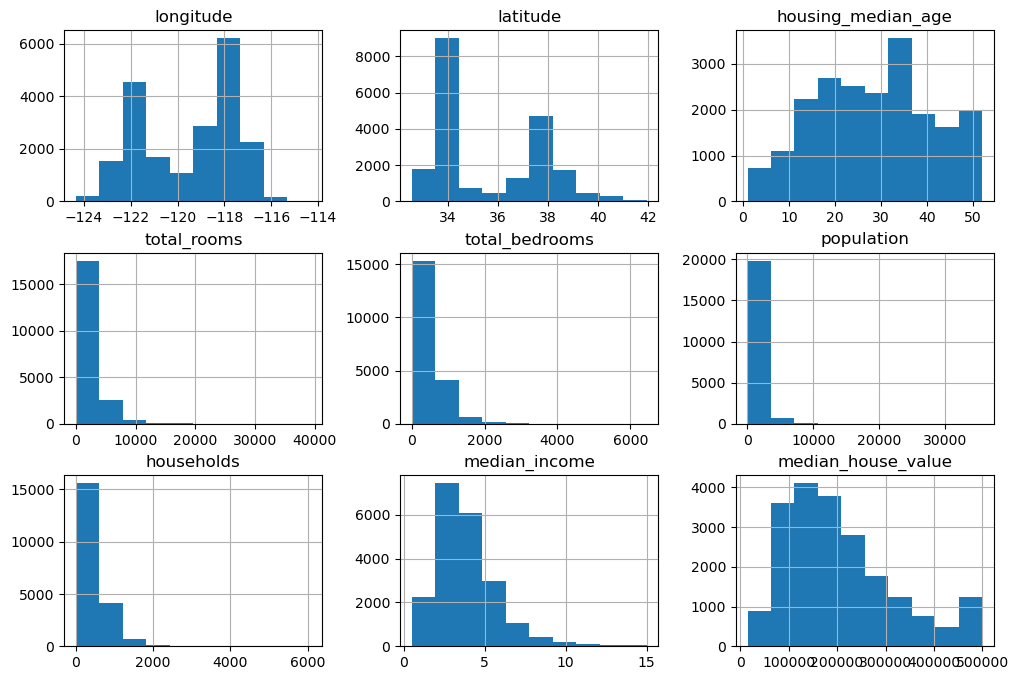

In [8]:
data.hist(figsize=(12,8))
plt.show()

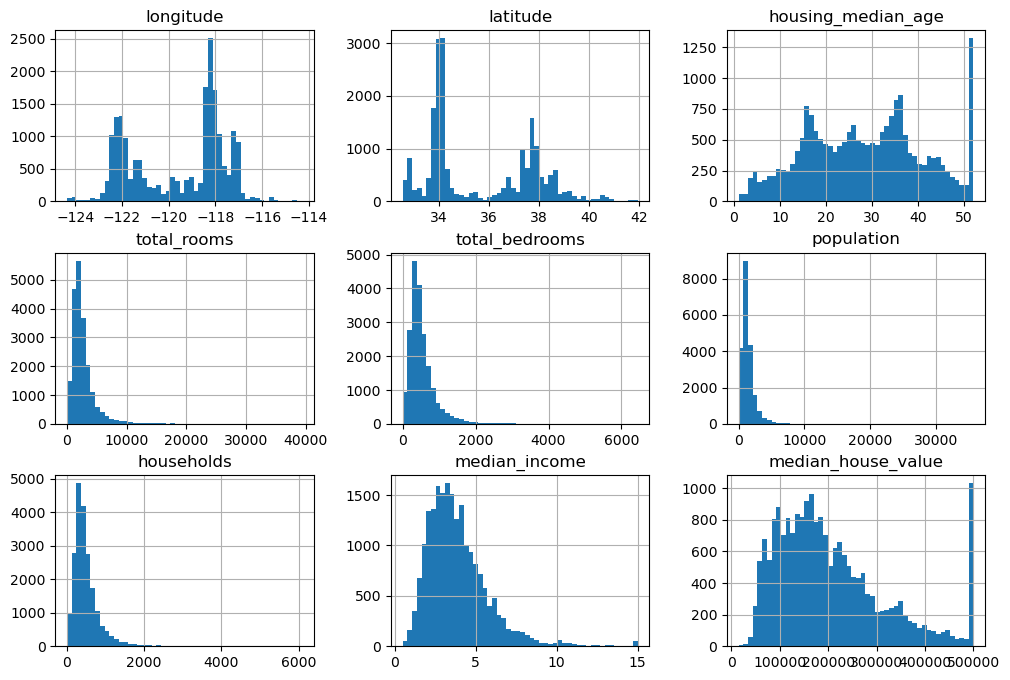

In [9]:
data.hist(figsize=(12,8),bins=50)
plt.show()

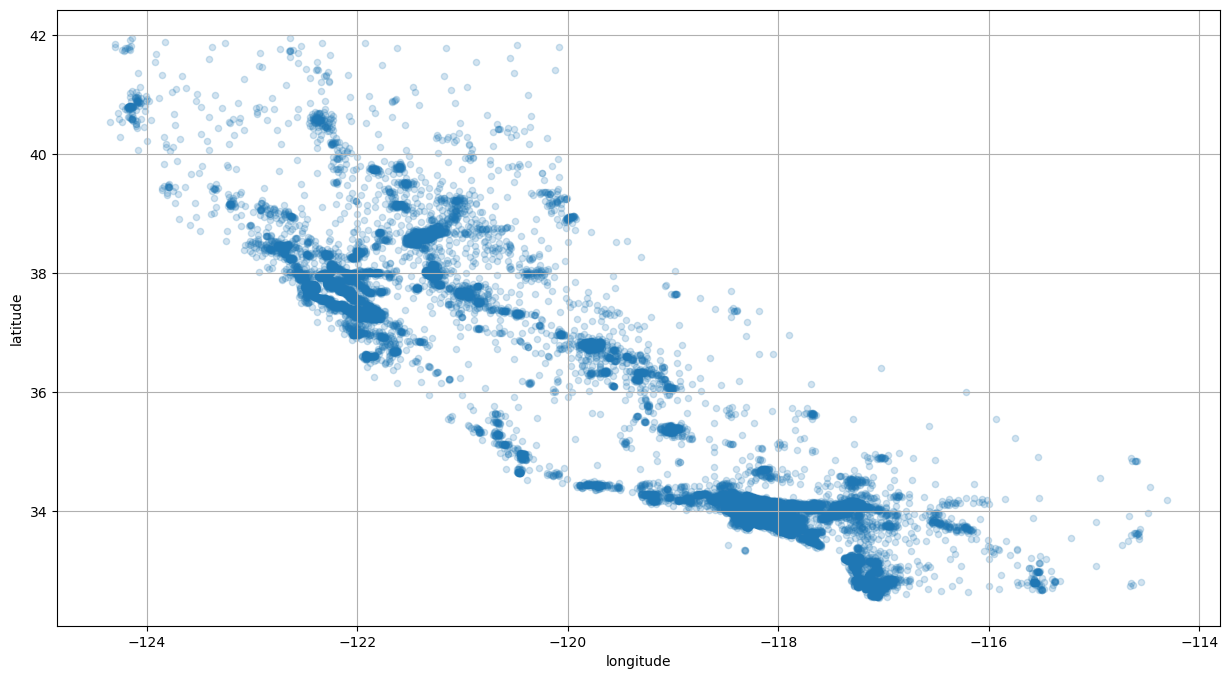

In [10]:
data.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2,figsize=(15,8))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

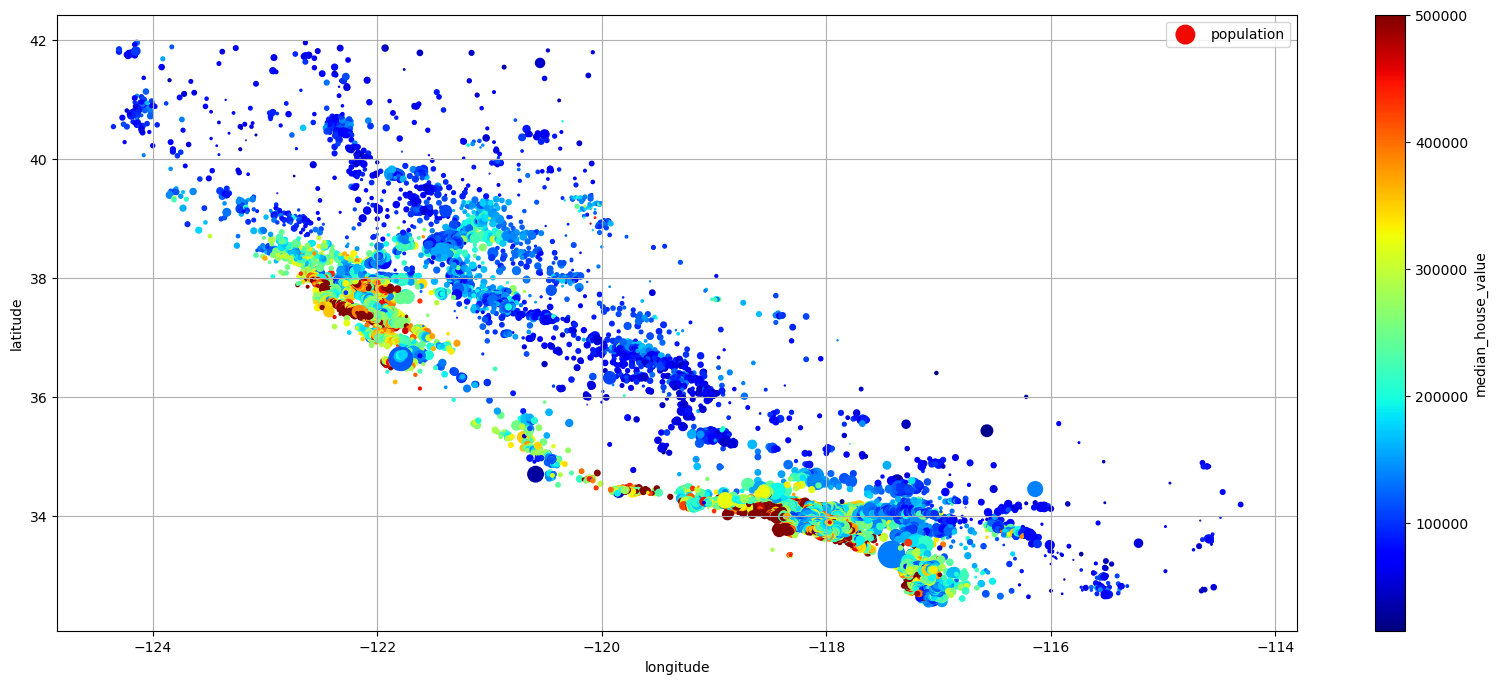

In [11]:
data.plot(kind="scatter",x="longitude",y="latitude",
          grid=True,
          s=data["population"]/100,
          label="population",
          c="median_house_value",
          cmap="jet",
          colorbar=True,
          legend=True,
          figsize=(20,8))

# data/feature correlation

In [12]:
corr_matrix=data.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [13]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

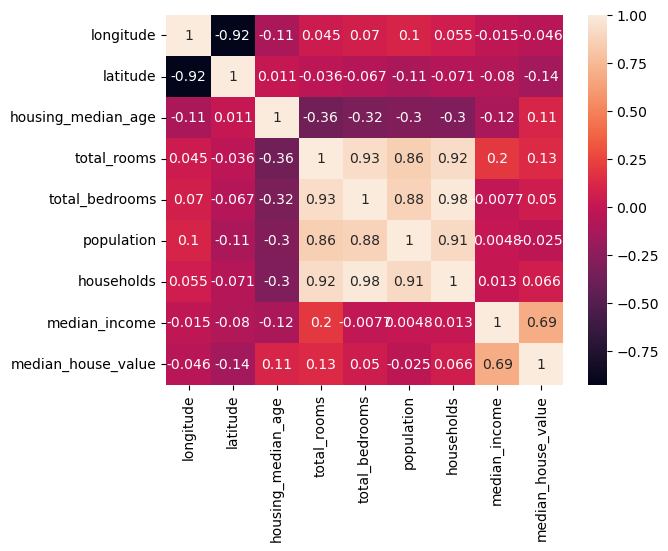

In [14]:

sn.heatmap(data.corr(),annot=True)

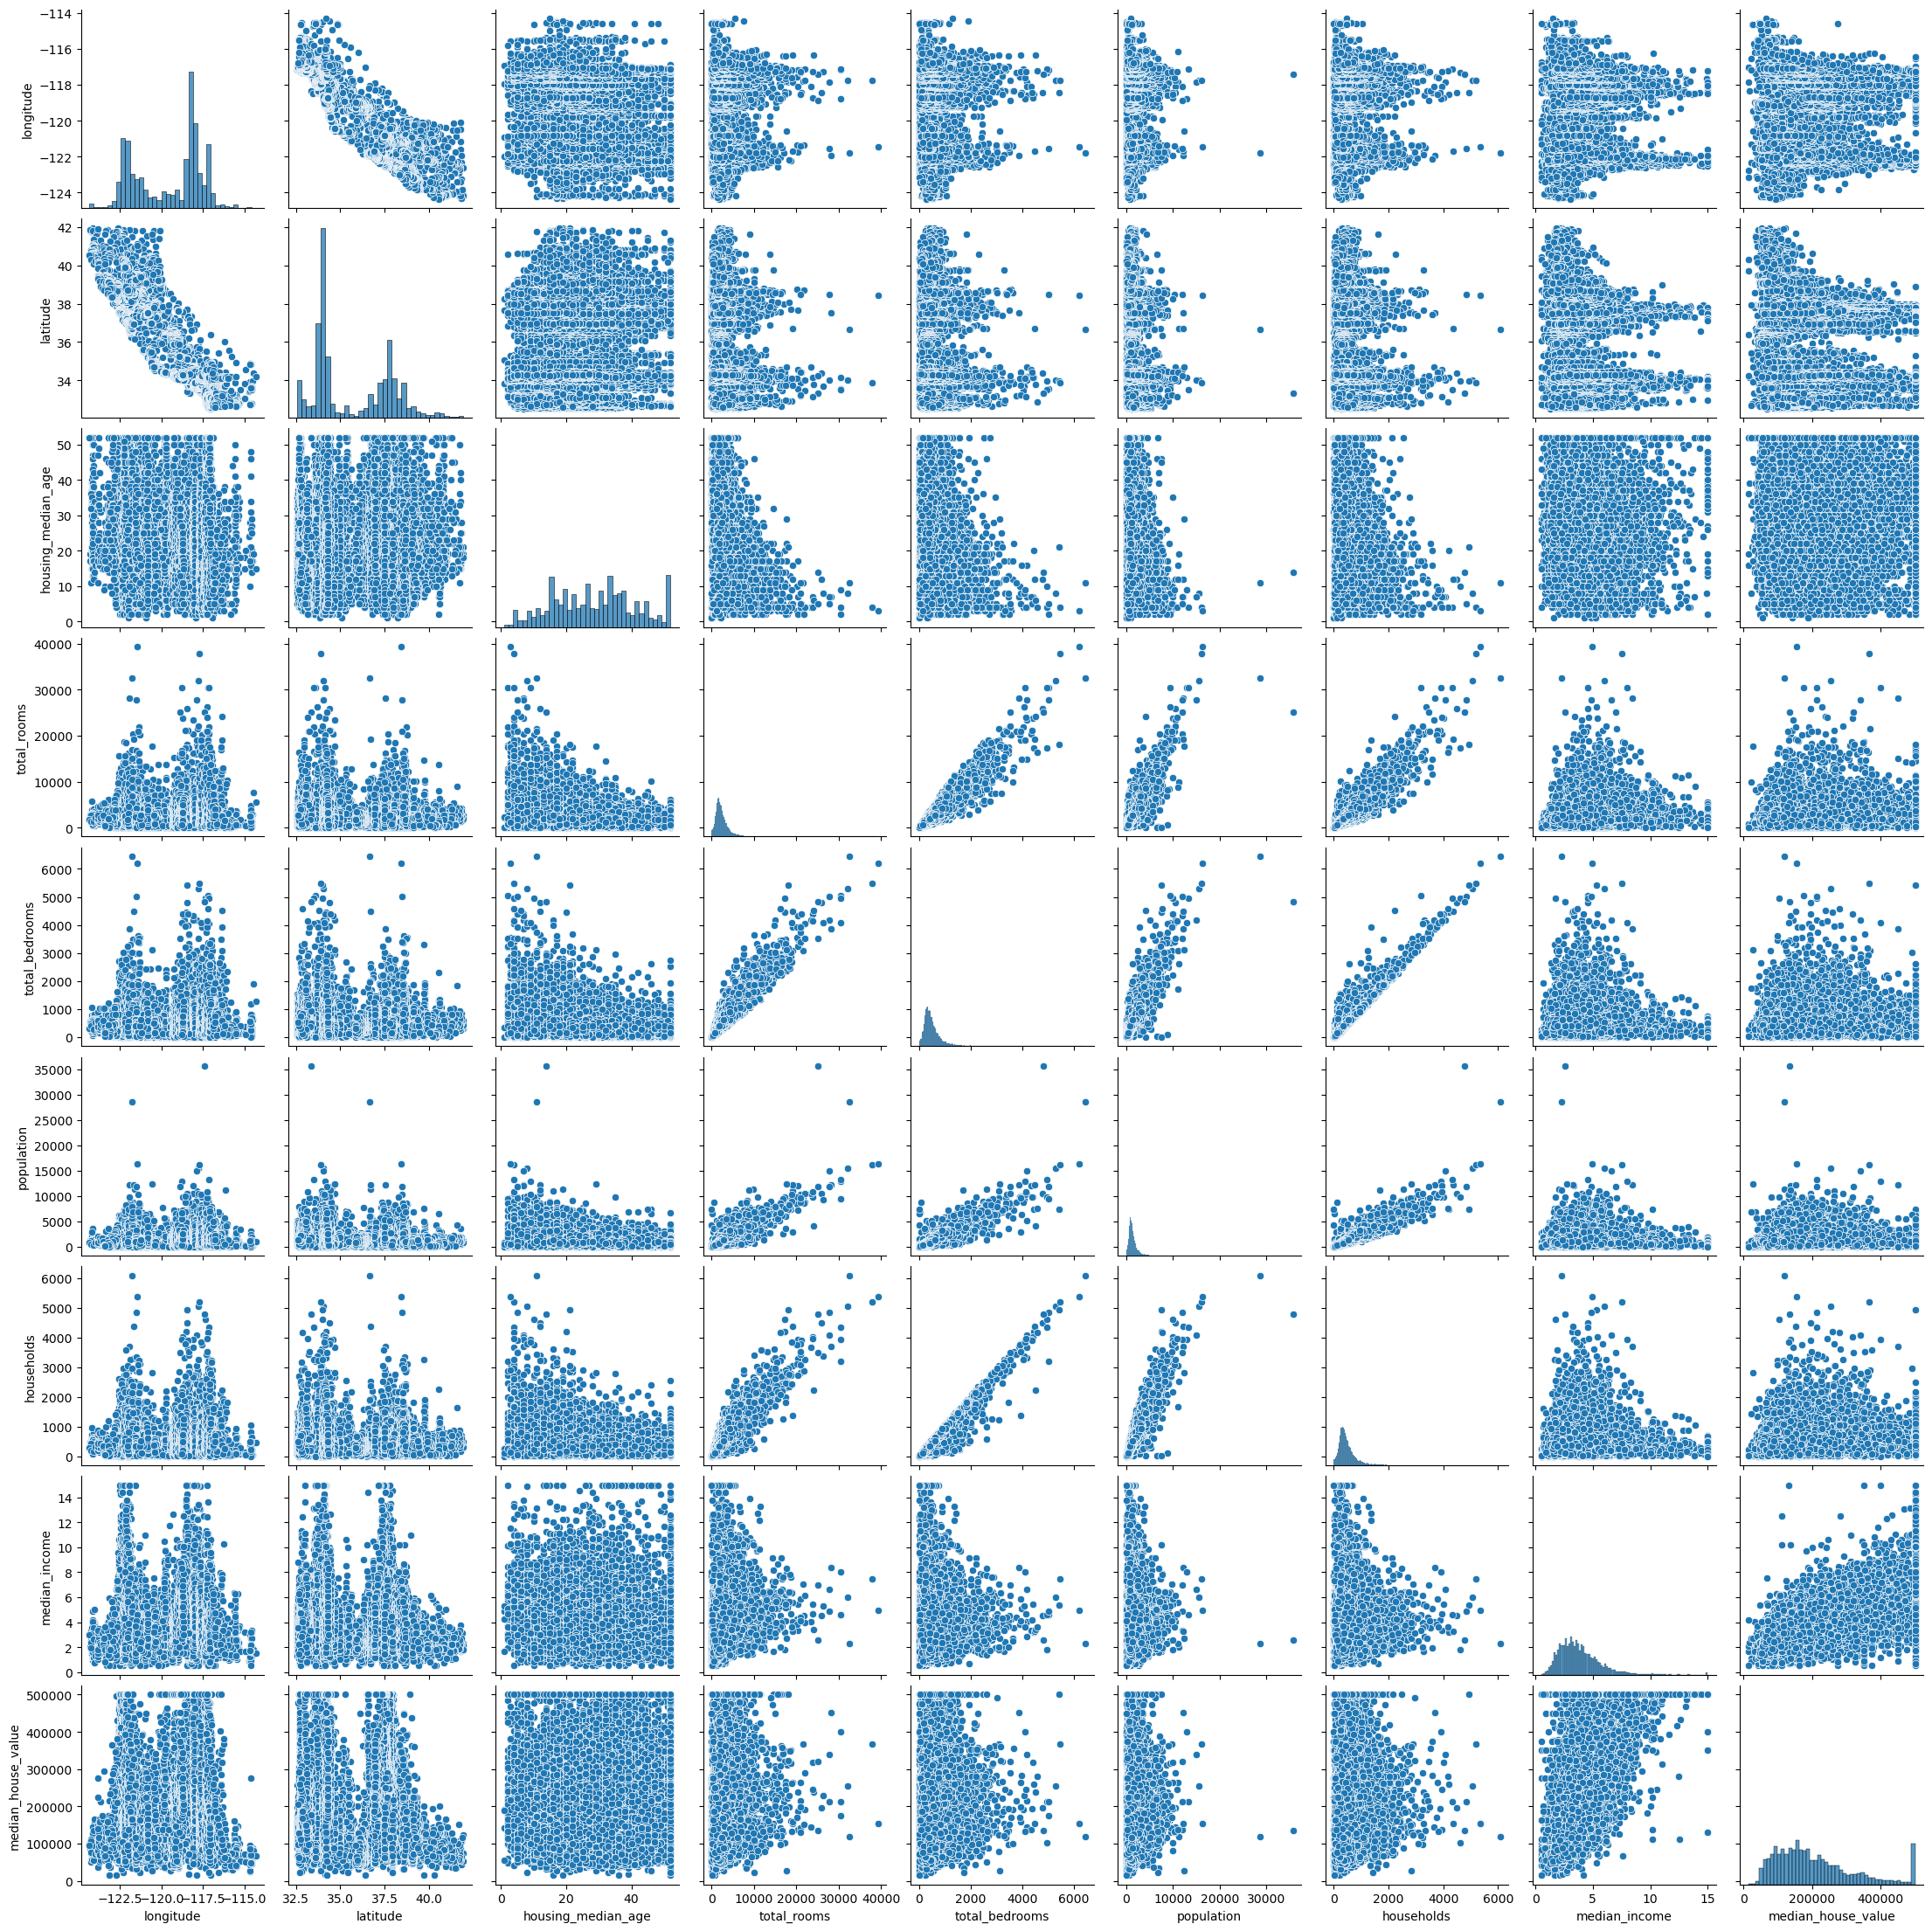

In [13]:
sn.pairplot(data)

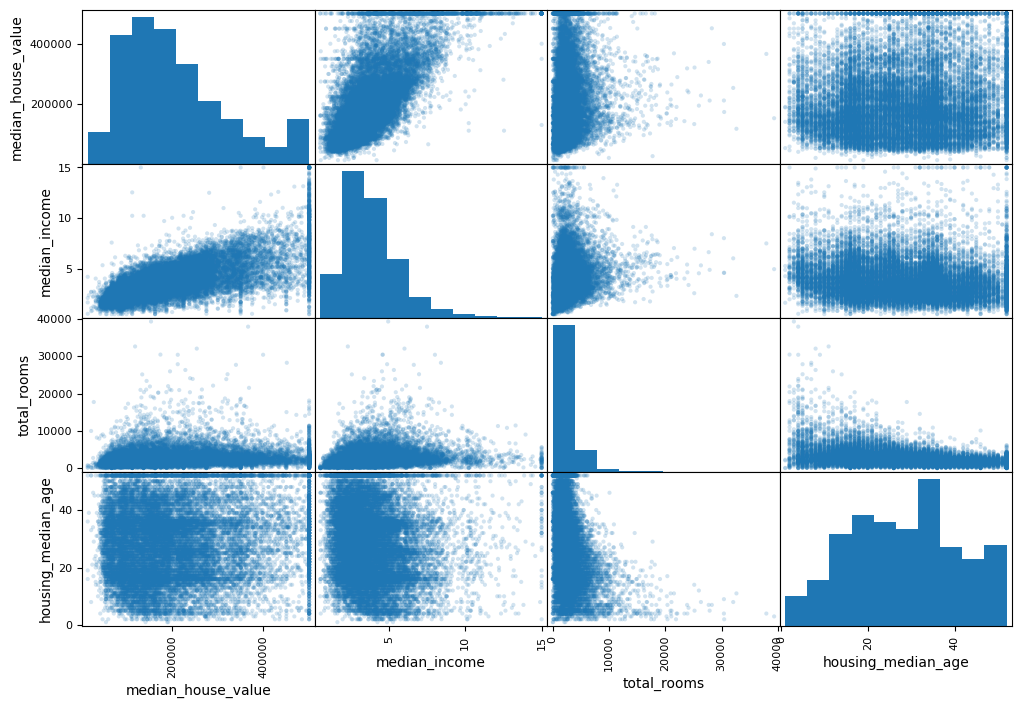

In [14]:
from pandas.plotting import scatter_matrix
attribute=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[attribute],figsize=(12,8),alpha=0.2)
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

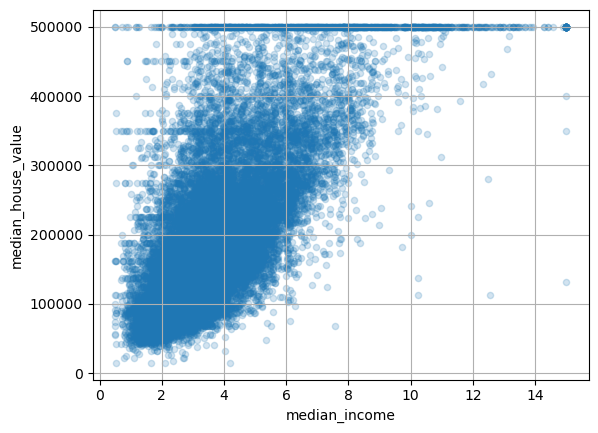

In [15]:
data.plot(kind="scatter",x="median_income",y="median_house_value",grid=True,alpha=0.2)

# Experiment with Attributes Combination

In [16]:
data["room_per_house"]=data["total_rooms"]/data["households"]
data["bedrooms_ratio"]=data["total_bedrooms"]/data["total_rooms"]
data["people_per_house"]=data["population"]/data["households"]

In [17]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   room_per_house  bedrooms_ratio  people_per_house  
0        6.984127        0.146591          2.555556  
1        6.238137        0.155797          2.109842  
2        8.288136        0.129516          2.802260  
3        5.817352        0.184458          2.547945  
4        6.281853        0.172096          2.181467

In [18]:
corr_matrix=data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

#new bedroom_ratio is more correlated we can see

median_house_value    1.000000
median_income         0.688075
room_per_house        0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [19]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
room_per_house          0
bedrooms_ratio        207
people_per_house        0
dtype: int64

In [20]:
len(data)

20640

In [21]:
data2=data.dropna()

In [22]:
len(data)

20640

In [23]:
len(data2)

20433

In [24]:
data2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
room_per_house        0
bedrooms_ratio        0
people_per_house      0
dtype: int64

In [25]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   room_per_house  bedrooms_ratio  people_per_house  
0        6.984127        0.146591          2.555556  
1        6.238137        0.155797          2.109842  
2        8.288136        0.129516          2.802260  
3        5.817352        0.184458          2.547945  
4        6.281853        0.172096          2.181467

# Handling missing data with `Imputer`


In [26]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   room_per_house  bedrooms_ratio  people_per_house  
0        6.984127        0.146591          2.555556  
1        6.238137        0.155797          2.109842  
2        8.288136        0.129516          2.802260  
3        5.817352        0.184458          2.547945  
4        6.281853        0.172096          2.181467

In [27]:
data['median_income'].isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms_ratio', ylabel='Density'>

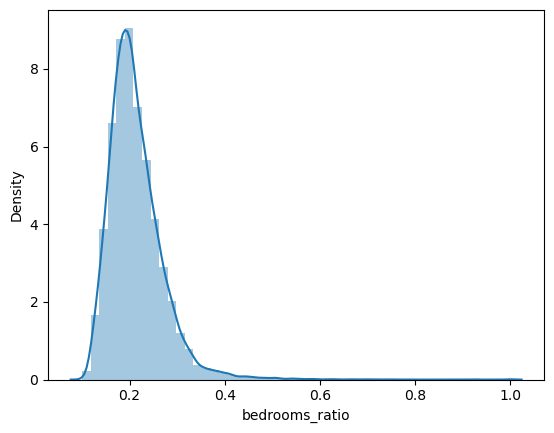

In [28]:
sn.distplot(data["bedrooms_ratio"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms_ratio'>

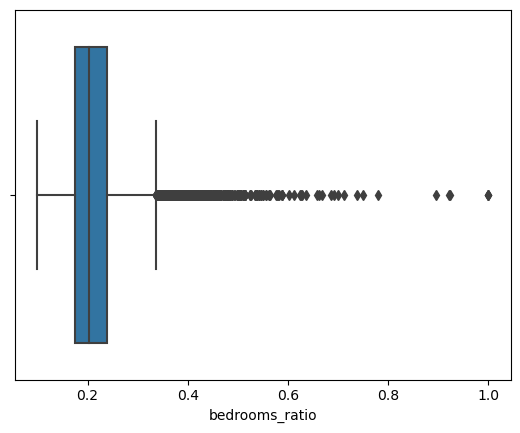

In [29]:
sn.boxplot(data["bedrooms_ratio"])

<AxesSubplot:ylabel='Density'>

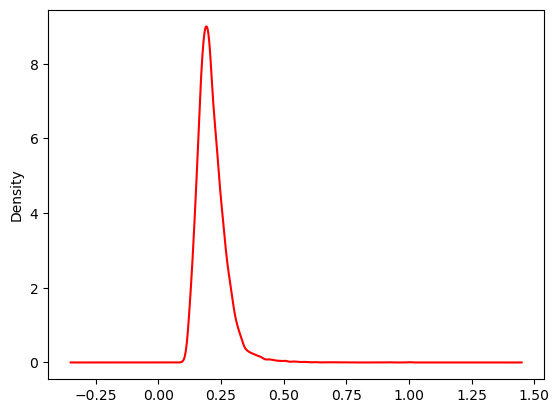

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
data["bedrooms_ratio"].plot(kind='kde',ax=ax,color='red')

In [31]:
data_feature=data.drop("median_house_value",axis=1)

In [32]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [33]:
#we are applying in whole data, we can also do with single single row
data_num=data_feature.select_dtypes(include=[np.number])
imputer1.fit(data_num)
imputer2.fit(data_num)

SimpleImputer()

In [34]:
#FIt the data into imputer
imputer1.fit(data_num)

SimpleImputer(strategy='median')

In [35]:
imputer1.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [36]:
data_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

our imputer.trasform(data_num) is a numpy array,X has nither columns nor index

In [37]:
X=imputer1.transform(data_num)
X

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]])

In [38]:
#for mean as imputer strategy
X2=imputer2.transform(data_num)
X2

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]])

In [39]:
data_tr=pd.DataFrame(X,columns=data_num.columns,
                     index=data_num.index)
#same time applying for means so that we can check which is giving accuret result..as original distribution
data_tr2=pd.DataFrame(X2,columns=data_num.columns,
                     index=data_num.index)

In [40]:
data_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  room_per_house  bedrooms_ratio  \
0       322.0       126.0         8.3252        6.984127        0.146591   
1      2401.0      1138.0         8.3014        6.238137        0.155797   
2       496.0       177.0         7.2574        8.288136        0.129516   
3       558.0       219.0         5.6431        5.817352        0.184458   
4       565.0       259.0         3.8462        6.281853        0.172096   

   people_per_house  
0          2.555556  
1          2.109842  
2          2.802260  
3          2.547945  
4          2.181467

In [41]:
data_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
room_per_house        0
bedrooms_ratio        0
people_per_house      0
dtype: int64

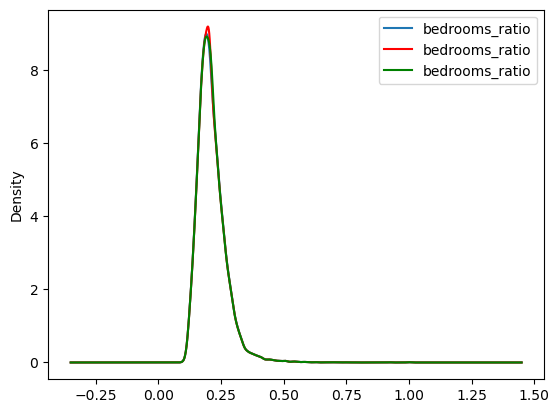

In [42]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data of brdroom_ratio before imputer
data["bedrooms_ratio"].plot(kind='kde',ax=ax)

#Variable imputer with the median
data_tr['bedrooms_ratio'].plot(kind='kde',ax=ax,color='red')

#Variable imputer with the median
data_tr2['bedrooms_ratio'].plot(kind='kde',ax=ax,color='green')

#add legend
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")



perfect `no distribution shape changes` which we shoud look for while doing imputer for both mean and median

means we can go for it

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms_ratio'>

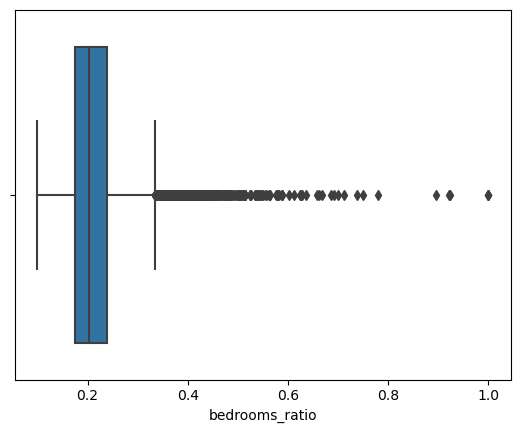

In [44]:
sn.boxplot(data_tr["bedrooms_ratio"])

In [16]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [17]:
dummy=pd.get_dummies(data.ocean_proximity)

In [18]:
dummy

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]